In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline
import inspect

import warnings
warnings.filterwarnings('ignore')

X.shape: (26, 2)


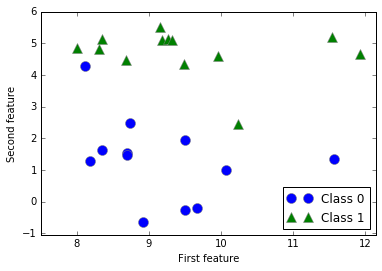

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

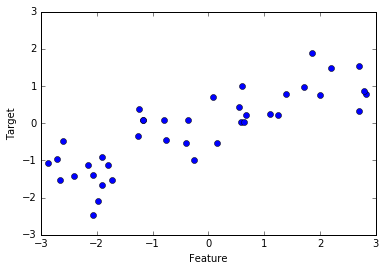

In [3]:
# plot the dataset
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
# breast cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("-"*80)
print("Shape of cancer data: {}".format(cancer.data.shape))
print("-"*80)
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("-"*80)
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['feature_names', 'target', 'target_names', 'DESCR', 'data'])
--------------------------------------------------------------------------------
Shape of cancer data: (569, 30)
--------------------------------------------------------------------------------
Sample counts per class:
{'malignant': 212, 'benign': 357}
--------------------------------------------------------------------------------
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


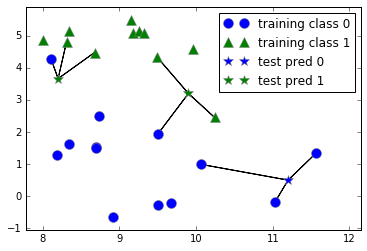

In [5]:
# knn classification with 3 n_neigh
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
# print source code
print(inspect.getsource(mglearn.plots.plot_knn_classification))

def plot_knn_classification(n_neighbors=1):
    X, y = make_forge()

    X_test = np.array([[8.2, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])



In [7]:
# knn classification on dataset
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


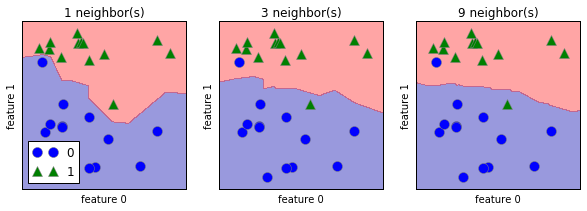

In [8]:
# plot with different n_neigh
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

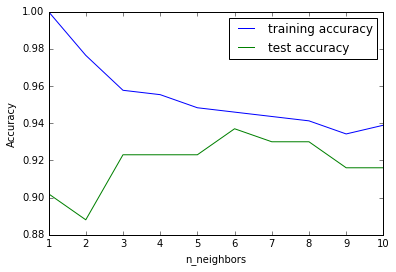

In [9]:
# training vs test data accuracy with diff n_neigh
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [10]:
# print source code
print(inspect.getsource(mglearn.plots.plot_knn_regression))

def plot_knn_regression(n_neighbors=1):
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    p

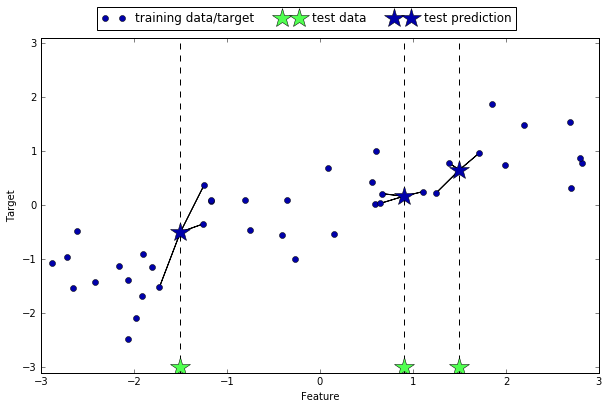

In [11]:
# plot knn regression with diff n_neigh
mglearn.plots.plot_knn_regression(n_neighbors=3)

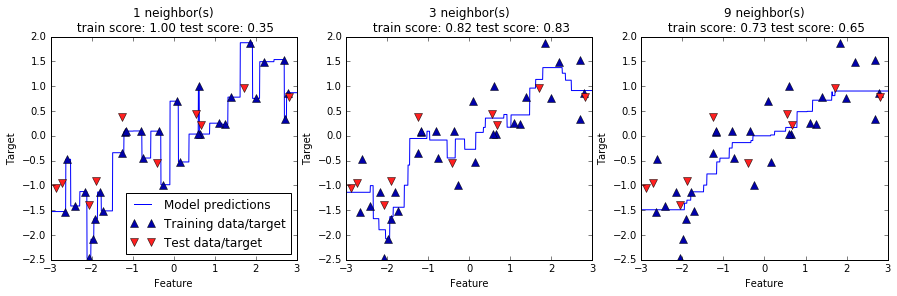

In [12]:
# plot knn regression with diff n_neigh
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


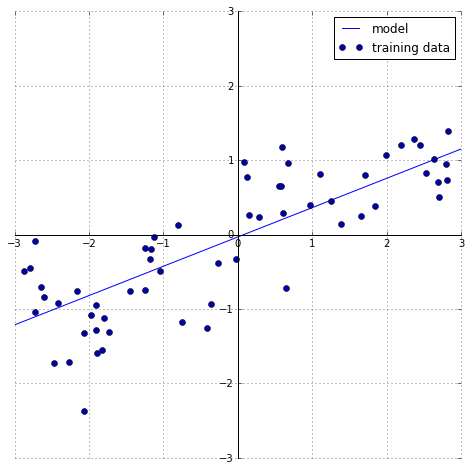

In [13]:
# linear regression plot
mglearn.plots.plot_linear_regression_wave()

In [14]:
# training vs test accuracy for diff liner models
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Linear Regression")
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print("-"*50)

from sklearn.linear_model import Ridge
print("Ridge Regression")
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("-"*50)

print("Ridge Regression with alpha 10")
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

print("-"*50)

print("Ridge Regression with alpha 0.1")
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


print("-"*50)

print("Lasso Regression")
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("-"*50)
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
print("Lasso Regression with alpha .01")
from sklearn.linear_model import Lasso
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

print("-"*50)
print("Lasso Regression with alpha .001")
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Linear Regression
Training set score: 0.95
Test set score: 0.61
--------------------------------------------------
Ridge Regression
Training set score: 0.89
Test set score: 0.75
--------------------------------------------------
Ridge Regression with alpha 10
Training set score: 0.79
Test set score: 0.64
--------------------------------------------------
Ridge Regression with alpha 0.1
Training set score: 0.93
Test set score: 0.77
--------------------------------------------------
Lasso Regression
Training set score: 0.29
Test set score: 0.21
Number of features used: 4
--------------------------------------------------
Lasso Regression with alpha .01
Training set score: 0.90
Test set score: 0.77
Number of features used: 33
--------------------------------------------------
Lasso Regression with alpha .001
Training set score: 0.95
Test set score: 0.64
Number of features used: 94


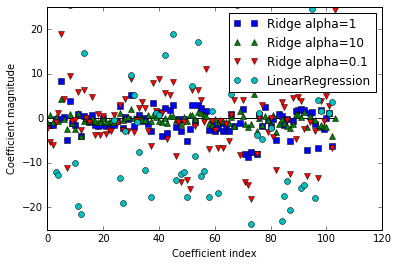

In [15]:
# plot for diff regression
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

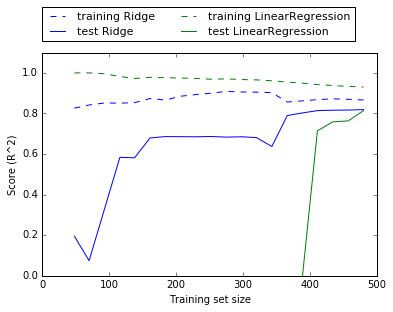

In [16]:
# score vs training sample size
mglearn.plots.plot_ridge_n_samples()

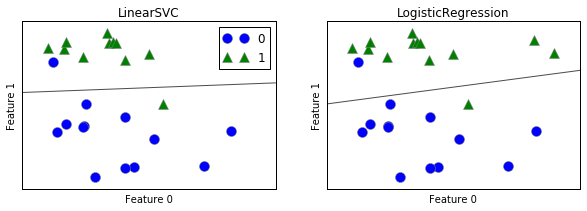

In [17]:
# plot for LinearSVC Vs LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


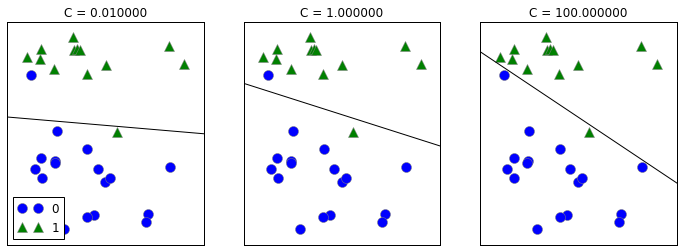

In [18]:
# plot for LinearSVC with regularization
mglearn.plots.plot_linear_svc_regularization()

In [19]:
# training vs test accuracy for diff coeff
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print("Logistic Regression")
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

print("-"*50)

print("Logistic Regression with C 100")
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

print("-"*50)

print("Logistic Regression with C 0.01")
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Logistic Regression
Training set score: 0.953
Test set score: 0.958
--------------------------------------------------
Logistic Regression with C 100
Training set score: 0.972
Test set score: 0.965
--------------------------------------------------
Logistic Regression with C 0.01
Training set score: 0.934
Test set score: 0.930


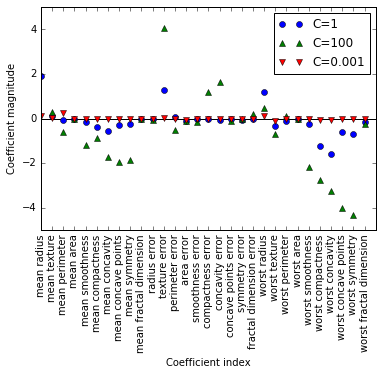

In [20]:
# plot for diff coeff
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
--------------------------------------------------
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
--------------------------------------------------
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98
--------------------------------------------------


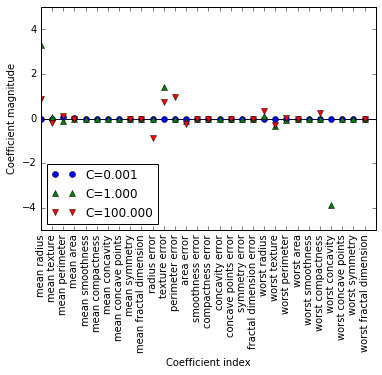

In [21]:
# training vs test accuracy for diff coeff
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    print("-"*50)
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

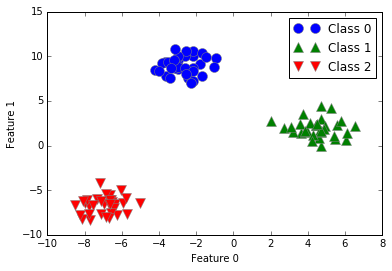

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


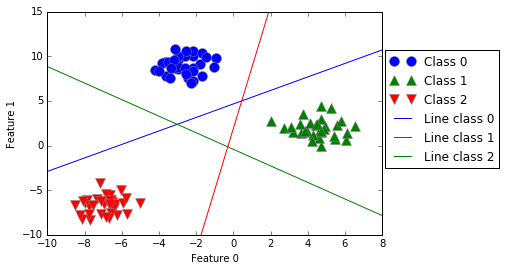

In [23]:
# plot for LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

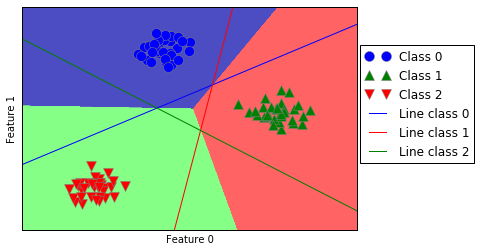

In [24]:
# plot for LinearSVC
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [25]:
# training vs test accuracy for Decision Tree
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print("Decision Tree Classifier")      
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("-"*50)

print("Decision Tree Classifier with max_depth 4") 
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree Classifier
Accuracy on training set: 1.000
Accuracy on test set: 0.937
--------------------------------------------------
Decision Tree Classifier with max_depth 4
Accuracy on training set: 0.988
Accuracy on test set: 0.951


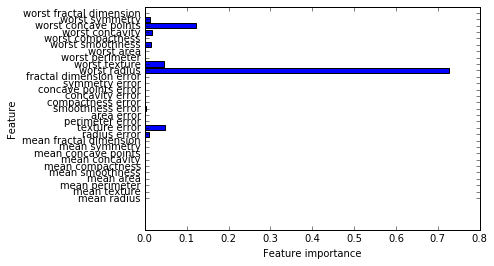

In [26]:
# feature importance plot for Decision Tree
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Accuracy on training set: 1.000
Accuracy on test set: 0.972


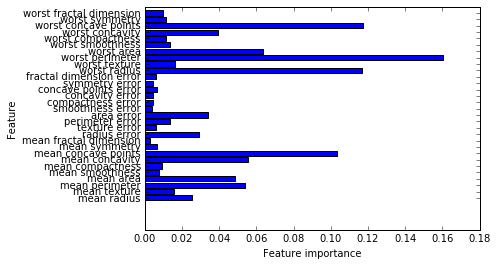

In [27]:
# feature importance plot for Random Forest
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_cancer(forest)

Gradient Boosting Classifier
Accuracy on training set: 1.000
Accuracy on test set: 0.958
--------------------------------------------------
Gradient Boosting Classifier with max_depth 1
Accuracy on training set: 0.991
Accuracy on test set: 0.972
--------------------------------------------------
Gradient Boosting Classifier with learning_rate 0.01
Accuracy on training set: 0.988
Accuracy on test set: 0.965


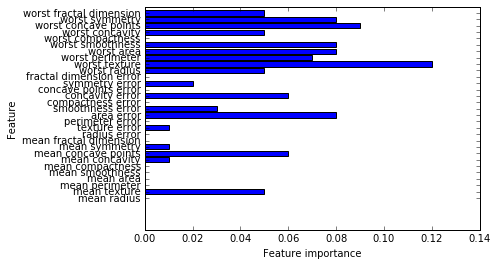

In [28]:
# training vs test accuracy for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

print("Gradient Boosting Classifier")
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

print("-"*50)

print("Gradient Boosting Classifier with max_depth 1")
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

print("-"*50)

print("Gradient Boosting Classifier with learning_rate 0.01")
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [29]:
# Support Vector Classifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

print("Support Vector Classifier")

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Support Vector Classifier
Accuracy on training set: 1.00
Accuracy on test set: 0.63


In [30]:
# Support Vector Classifier optimization

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
# print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
# print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

print("Support Vector Classifier with feature scaling")

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

print("-"*50)

print("Support Vector Classifier with C 1000")
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Support Vector Classifier with feature scaling
Accuracy on training set: 0.948
Accuracy on test set: 0.951
--------------------------------------------------
Support Vector Classifier with C 1000
Accuracy on training set: 0.988
Accuracy on test set: 0.972


In [31]:
# Neural Networks (Multi Layer Perceptron)
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

print("Multi Layer Perceptron")
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

print("-"*50)

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

print("Multi Layer Perceptron with feature scaling")
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("-"*50)

print("Multi Layer Perceptron with max_iter 1000")
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("-"*50)

print("Multi Layer Perceptron with max_iter 1000 & alpha 1")
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Multi Layer Perceptron
Accuracy on training set: 0.91
Accuracy on test set: 0.88
--------------------------------------------------
Multi Layer Perceptron with feature scaling
Accuracy on training set: 0.991
Accuracy on test set: 0.965
--------------------------------------------------
Multi Layer Perceptron with max_iter 1000
Accuracy on training set: 0.993
Accuracy on test set: 0.972
--------------------------------------------------
Multi Layer Perceptron with max_iter 1000 & alpha 1
Accuracy on training set: 0.988
Accuracy on test set: 0.972
